# NumPy: creating and manipulating numerical data

## The NumPy array object
### What are NumPy and NumPy arrays?

**NumPy arrays**

- Python objects:	
    - high-level number objects: integers, floating point
    - containers: lists (costless insertion and append), dictionaries (fast lookup)
- NumPy provides:	
    - extension package to Python for multi-dimensional arrays
    - closer to hardware (efficiency)
    - designed for scientific computation (convenience)
    - Also known as array oriented computing

In [9]:
import numpy as np
arr = np.array([0,2,3])
arr

array([0, 2, 3])

**Why it is useful:** Memory-efficient container that provides fast numerical operations.

In [15]:
L = range(1000)
%timeit [ i**2 for i in L]

351 µs ± 5.65 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [20]:
arr = np.arange(1000)
%timeit arr**2

1.35 µs ± 41.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Creating arrays

#### Manual construction of arrays

In [26]:
## 1-D
arr1 = np.array([1,2,3,4])
arr1

array([1, 2, 3, 4])

In [23]:
## 2-D, 3-D ...
arr2 = np.array([[1,2,3,4],[5,6,7,8]])
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [27]:
arr1.ndim

1

In [29]:
arr2.ndim

2

In [31]:
len(arr1)

4

In [33]:
len(arr2)

2

In [34]:
arr1.shape

(4,)

In [35]:
arr2.shape

(2, 4)

#### Functions for creating arrays

- Evenly spaced:

In [37]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [38]:
arr2 = np.arange(1,9,2)
arr2

array([1, 3, 5, 7])

- or by number of points:

In [44]:
arr = np.linspace(0, 1, 6)
arr

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [47]:
arr2 = np.linspace(0, 1, 5, endpoint=False)
arr2

array([0. , 0.2, 0.4, 0.6, 0.8])

- Common arrays:

In [56]:
arr = np.ones(3)
arr

array([1., 1., 1.])

In [54]:
arr2 = np.ones((3,4))   # reminder: (3, 3) is a tuple
arr2

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [53]:
arr3 = np.zeros((4,3))
arr3

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [61]:
arr4 = np.eye(3)
arr4

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [63]:
arr5 = np.diag(np.array([1,2,3,4,5]))
arr5

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

- **np.random:** random numbers (Mersenne Twister PRNG):

In [67]:
arr = np.random.rand(5)  # uniform in [0, 1]
arr

array([0.99013347, 0.55438976, 0.7834775 , 0.68914121, 0.72425024])

In [72]:
arr2 = np.random.randn(5)   # Gaussian
arr2

array([-0.04921387,  2.34141818,  0.1321019 , -0.45237733, -0.41967164])

In [74]:
arr3 = np.random.seed(1234)   # Setting the random seed
arr3

### Basic data types

In [85]:
a = np.array([1,2,3])
type(a)    # numpy.ndarray
a.dtype

dtype('int64')

In [88]:
b = np.array([1., 2., 3])
b.dtype

dtype('float64')

In [92]:
c = np.array([1,2,3], dtype=float)
c.dtype

dtype('float64')

In [94]:
d = np.ones((3,4))
d.dtype

dtype('float64')

In [95]:
e = np.array([1+2j, 3+4j, 5+6*1j])
e.dtype

dtype('complex128')

In [96]:
f = np.array([True, False, False, True])
f.dtype

dtype('bool')

In [98]:
g = np.array(['Bonjour', 'Hello', 'Hallo',])
g.dtype

dtype('<U7')

### Basic visualization
```
pip3 install matplotlib
```

In [7]:
%matplotlib inline

In [14]:
import numpy as np
import matplotlib.pyplot as plt

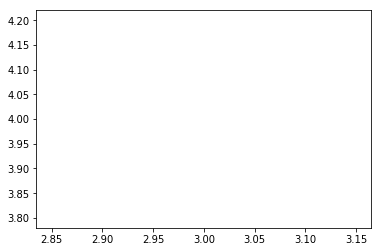

In [15]:
x,y = 3,4
plt.plot(x,y)
plt.show()

- **1D plotting:**

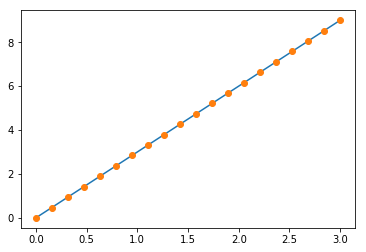

In [24]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9 , 20)
plt.plot(x, y)
plt.plot(x, y, 'o')
plt.show()

- **2D arrays** (such as images):

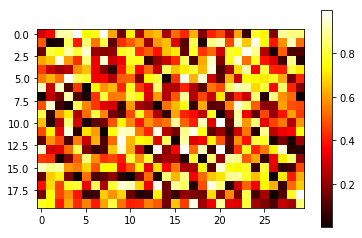

In [45]:
image = np.random.rand(20,30)
plt.imshow(image, cmap=plt.cm.hot)
plt.colorbar()
plt.show()

### Indexing and slicing

In [50]:
a = np.arange(10)
a[0], a[2], a[8]

(0, 2, 8)

In [53]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [55]:
a = np.diag(np.arange(4))
a

array([[0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]])

In [57]:
a[1,1]

1

In [59]:
a[1,3]=9
a

array([[0, 0, 0, 0],
       [0, 1, 0, 9],
       [0, 0, 2, 0],
       [0, 0, 0, 3]])

### Copies and views
### Fancy indexing

In [66]:
np.random.seed(3)
a = np.random.randint(0,21,15)
a

array([10,  3,  8,  0, 19, 10, 11,  9, 10,  6,  0, 20, 12,  7, 14])

In [71]:
a = np.arange(10)
idx = np.array([[3,4],[9,7]])
a[idx]

array([[3, 4],
       [9, 7]])